# Challenge: Feedback analysis
Unit 2 / Lesson 2 / Project 7

Now that you've spent some time tinkering with an example Naive Bayes Classifier, it's time to build your own.

We've mentioned that Naive Bayes is particularly good for text classification problems.
Before we made a spam filter and now we'll perform a sentiment analysis, classifying whether feedback left on a website is either positive or negative.

Again the UCI Machine Learning database has a nice labeled [dataset of sentiment labelled sentences](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences) for us to use.
This dataset was created for the paper [From Group to Individual Labels using Deep Features](http://mdenil.com/media/papers/2015-deep-multi-instance-learning.pdf), Kotzias et. al., KDD 2015.

Pick one of the company data files and build your own classifier.
When you're satisfied with its performance (use the accuracy measure shown in the example), test it on one of the other datasets to see how well these kinds of classifiers translate from one context to another.

Submit your model and a brief writeup of your feature engineering and selection process.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Grab and process the raw data.
PATH_amzn = ('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/sentiment_labelled_sentences/amazon_cells_labelled.txt')
PATH_imdb = ('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/sentiment_labelled_sentences/imdb_labelled.txt')
PATH_yelp = ('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/sentiment_labelled_sentences/yelp_labelled.txt')

amzn = pd.read_csv(PATH_amzn, delimiter='\t', header=None)
imdb = pd.read_csv(PATH_imdb, delimiter='\t', header=None)
yelp = pd.read_csv(PATH_yelp, delimiter='\t', header=None)

for i in [amzn, imdb, yelp]:
    i.columns = ['sentence', 'score']
    print(len(i))

amzn.head()

1000
748
1000


,sentence,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


We have three data sets, each with a sentence and a score.

Score is either 1 (for positive) or 0 (for negative)	
The sentences come from three different websites/fields: 
- imdb.com 
- amazon.com 
- yelp.com 

For each website, there exist 500 positive and 500 negative sentences.
The sentences were extracted from reviews of products, movies, and restaurants.
Those were selected randomly for larger datasets of reviews. 
The sentences were selected to have a clearly positive or negative connotaton, the goal was for no neutral sentences to be selected.

Let's start our analysis by comparing the sentences to a list of words with a distinct positive or negative correlation.

In [34]:
# create a list of positive and negative words
positive = ['great', 'good', 'love', 'awesome', 'easy', 'helpful', 'useful', 'simple',
            'worth', 'thanks', 'amazing', 'perfect', 'price', 'everything', 'ever', 'must',
           'recommend', 'always', 'learn']

negative = ['waste', 'money', 'crashes', 'tried', 'useless', 'nothing', "didn't", 'stupid']

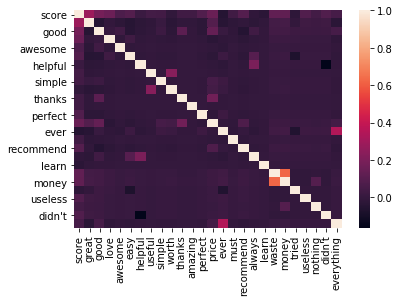

In [35]:
# create a feature for each item in positive list
for i in positive:
    amzn[str(i)] = amzn.sentence.str.contains(
        str(i),
        case=False
    )

# create a heatmap to view correlation
sns.heatmap(amzn.corr());

In [36]:
# drop any features that exhibit correlation
amzn = amzn.drop('everything', axis=1)
amzn.head()

,sentence,score,great,good,love,awesome,easy,helpful,useful,simple,...,must,recommend,always,learn,waste,money,tried,useless,nothing,didn't
0,So there is no way for me to plug it in here i...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
1,"Good case, Excellent value.",1,False,True,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
2,Great for the jawbone.,1,True,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
3,Tied to charger for conversations lasting more...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
4,The mic is great.,1,True,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True


In [40]:
#perform naive bayes model
data = amzn.iloc[:,2:]
target = amzn['score']

In [41]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# instantiate our model and store it in a new variable
bnb = BernoulliNB()

# fit our model to the data
bnb.fit(data, target)

# classify, storing the result in a new variable
y_pred = bnb.predict(data)

# display our results
print('Number of mislabeled points out of a total {} points: {}'.format(
    data.shape[0],
    (target != y_pred).sum()
    ))

Number of mislabeled points out of a total 1000 points: 295


Looks like our model has roughly a 70% success rate. Not _that_ great.
Let's see if we can improve our model performance with the addition of negative words.

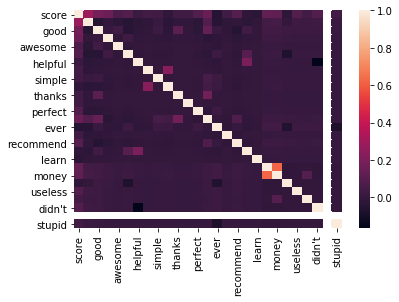

In [47]:
# create a feature for each item in positive list
for i in negative:
    amzn[str(i)] = ~amzn.sentence.str.contains(
        str(i),
        case=False
    )

# create a heatmap to view any possible correlation
sns.heatmap(amzn.corr());

In [49]:
# drop any features that exhibit correlation
amzn = amzn.drop('crashes', axis=1)
amzn = amzn.drop('stupid', axis=1)
amzn.head()

,sentence,score,great,good,love,awesome,easy,helpful,useful,simple,...,must,recommend,always,learn,waste,money,tried,useless,nothing,didn't
0,So there is no way for me to plug it in here i...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
1,"Good case, Excellent value.",1,False,True,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
2,Great for the jawbone.,1,True,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
3,Tied to charger for conversations lasting more...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
4,The mic is great.,1,True,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True


In [50]:
# perform another naive bayes model
data = amzn.iloc[:,2:]
target = amzn['score']

In [51]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# instantiate our model and store it in a new variable
bnb = BernoulliNB()

# fit our model to the data
bnb.fit(data, target)

# classify, storing the result in a new variable
y_pred = bnb.predict(data)

# display our results
print('Number of mislabeled points out of a total {} points: {}'.format(
    data.shape[0],
    (target != y_pred).sum()
    ))

Number of mislabeled points out of a total 1000 points: 295


It looks like the addition of negative word features to our model didn't improve our success rate at all.

It's possible our model will be more successful when applied to a different data set.
Let's try our model on the yelp data

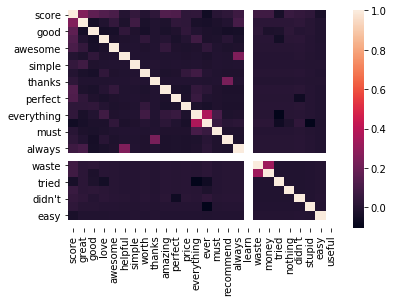

In [52]:
# create a feature for each item in positive list
for i in positive:
    yelp[str(i)] = yelp.sentence.str.contains(
        str(i),
        case=False
    )

sns.heatmap(yelp.corr());

In [53]:
#drop any correlated features
yelp = yelp.drop('easy', axis=1)
yelp = yelp.drop('useful', axis=1)
yelp.head()

,sentence,score,great,good,love,awesome,helpful,simple,worth,thanks,...,must,recommend,always,learn,waste,money,tried,nothing,didn't,stupid
0,Wow... Loved this place.,1,False,False,True,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
1,Crust is not good.,0,False,True,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
2,Not tasty and the texture was just nasty.,0,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
3,Stopped by during the late May bank holiday of...,1,False,False,True,False,False,False,False,False,...,False,True,False,False,True,True,True,True,True,True
4,The selection on the menu was great and so wer...,1,True,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True


In [54]:
# perform a naive bayes model on the yelp dataset
data = yelp.iloc[:,2:]
target = yelp['score']

In [55]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# instantiate our model and store it in a new variable
bnb = BernoulliNB()

# fit our model to the data
bnb.fit(data, target)

# classify, storing the result in a new variable
y_pred = bnb.predict(data)

# display our results
print('Number of mislabeled points out of a total {} points: {}'.format(
    data.shape[0],
    (target != y_pred).sum()
    ))

Number of mislabeled points out of a total 1000 points: 320


Looks like our model was even less successful with the yelp dataset.
Let's see if the addition of the negative words features improves performance.

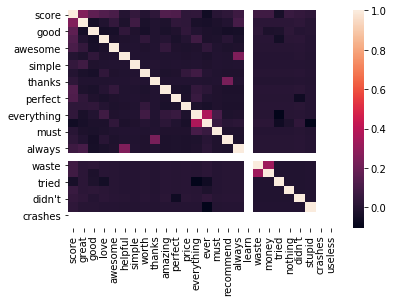

In [57]:
for i in negative:
    yelp[str(i)] = ~yelp.sentence.str.contains(
        str(i),
        case=False
    )

sns.heatmap(yelp.corr());

In [58]:
# drop correlated features
yelp = yelp.drop('crashes', axis=1)
yelp = yelp.drop('useless', axis=1)

yelp.head()

,sentence,score,great,good,love,awesome,helpful,simple,worth,thanks,...,must,recommend,always,learn,waste,money,tried,nothing,didn't,stupid
0,Wow... Loved this place.,1,False,False,True,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
1,Crust is not good.,0,False,True,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
2,Not tasty and the texture was just nasty.,0,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
3,Stopped by during the late May bank holiday of...,1,False,False,True,False,False,False,False,False,...,False,True,False,False,True,True,True,True,True,True
4,The selection on the menu was great and so wer...,1,True,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True


In [59]:
data = yelp.iloc[:,2:]
target = yelp['score']

In [60]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# instantiate our model and store it in a new variable
bnb = BernoulliNB()

# fit our model to the data
bnb.fit(data, target)

# classify, storing the result in a new variable
y_pred = bnb.predict(data)

# display our results
print('Number of mislabeled points out of a total {} points: {}'.format(
    data.shape[0],
    (target != y_pred).sum()
    ))

Number of mislabeled points out of a total 1000 points: 320


Looks like our performance wasn't improved again.
Let's try it with a different dataset.
The Atlantic published an article about the [happiest words in the english language](https://www.theatlantic.com/technology/archive/2016/07/the-200-happiest-words-in-literature/490916/), that sounds like a new place to start.

In [26]:
#initiate a new dataframe
amzn_new = pd.read_csv(PATH_amzn, delimiter='\t', header=None)
amzn_new.columns = ['sentence', 'score']

print(len(amzn_new))

amzn_new.head()

1000


,sentence,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [27]:
# create a new list of positive words
pos_new = ['laughter', 'love', 'happy', 'laugh',
           'excellent', 'joy', 'success', 'win', 'rainbow', 'smile', 'won',
           'pleasure', 'smile', 'rainbow', 'celebrate', 'enjoy', 'health',
           'music', 'weekend', 'comedy',
           'joke', 'rich', 'victory', 'Christmas', 'free', 'friend', 'fun', 'holiday',
           'love', 'beach', 'kiss', 'sunshine', 'delicious',
           'friend', 'funny', 'outstanding', 'paradise', 'sweet', 'vacation', 'butterfly',
           'freedom', 'flower', 'great', 'sunlight', 'sweetheart', 'award',
           'chocolate', 'heaven', 'peace', 'splendid',
           'kiss', 'attract', 'hero', 'hug', 'positive', 'sun', 'birthday',
           'bless', 'fantastic', 'delight', 'beauty', 'entertain',
           'fun', 'honest', 'sky', 'wonder', 'glory',
           'promote', 'family', 'gift', 'humor', 'romantic', 'cupcake', 'festival',
           'honour', 'relax', 'weekend', 'angel', 'bonus', 'brilliant',
           'diamond', 'holiday', 'lucky', 'mother', 'super', 'amazing', 'angel', 'enjoy',
           'friend', 'profit', 'fine', 'champion', 'kitten',
           'miracle', 'bright', 'cute', 'excite', 'joke',
           'million', 'prize', 'shine', 'awesome', 'genius',
           'achieve', 'cake', 'cheer', 'excite', 'good', 'hug', 'income', 'party', 'puppy',
           'song', 'tasty', 'billion', 'easy', 'flower', 'gold', 'merry',
           'handsome', 'affection', 'candy', 'diamond', 'earn', 'interest', 'peace',
           'praise', 'relax', 'rose', 'Saturday', 'faith', 'heaven', 'cherish', 'comfort',
           'congrat', 'cupcake', 'earn', 'extraordinary', 'glory', 'hilarious', 'moonlight',
           'optimist', 'romance', 'feast', 'attractive', 'glad', 'internet', 'pleasant',
           'profit', 'smart']

# let's try to drop all the duplicates
print(len(pos_new))
pos_new = set(pos_new)
pos_new = list(pos_new)
len(pos_new)

150


127

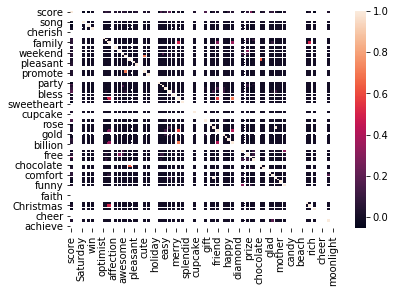

In [28]:
# create a feature for each word in pos_new
for i in pos_new:
    amzn_new[str(i)] = amzn_new.sentence.str.contains(
        str(i),
        case=False
    )

# check for correlation
sns.heatmap(amzn_new.corr());

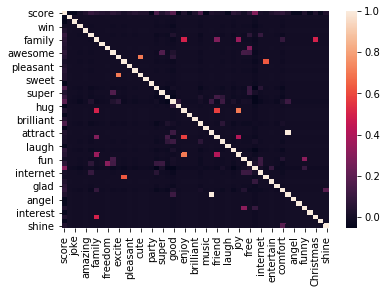

In [29]:
# drop correlated values
list_drop = ['Saturday', 'lucky', 'achieve', 'outstanding', 'honest', 'flower', 'comedy',
             'promote', 'miracle', 'chocolate', 'tasty', 'faith', 'delight', 'kiss',
             'rainbow', 'smile', 'champion', 'sunshine', 'relax', 'cupcake', 'million',
             'diamond', 'affection', 'handsome', 'heaven', 'success', 'award', 'candy',
             'splendid', 'hero', 'bonus', 'bright', 'pleasure', 'beach', 'genius', 'vacation',
             'butterfly', 'rose', 'weekend', 'honour', 'positive', 'rich', 'peace', 'income',
             'health', 'delicious', 'praise', 'bless', 'billion', 'birthday', 'victory','gold',
             'humor', 'beauty', 'glory', 'romantic', 'merry', 'extraordinary', 'hilarious',
             'holiday', 'prize', 'moonlight', 'profit', 'sunlight', 'cake', 'cheer', 'congrat',
             'kitten', 'celebrate', 'festival', 'sweetheart', 'cherish', 'romance', 'puppy',
             'gift', 'optimist', 'laughter', 'paradise', 'feast']

for i in list_drop:
    amzn_new = amzn_new.drop(i, axis=1)

amzn_new.head()

sns.heatmap(amzn_new.corr());

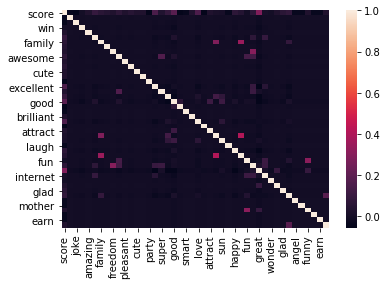

In [30]:
list_new = ['excite','attractive', 'enjoy', 'won', 'Christmas']

for i in list_new:
    amzn_new = amzn_new.drop(i, axis=1)

amzn_new.head()

sns.heatmap(amzn_new.corr());

Now we have a much larger set of features to work with.
Let's run a naive bayes model again and see what our results are.

In [31]:
data = amzn_new.iloc[:,2:]
target = amzn_new['score']

In [32]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# instantiate our model and store it in a new variable
bnb = BernoulliNB()

# fit our model to the data
bnb.fit(data, target)

# classify, storing the result in a new variable
y_pred = bnb.predict(data)

# display our results
print('Number of mislabeled points out of a total {} points: {}'.format(
    data.shape[0],
    (target != y_pred).sum()
    ))

Number of mislabeled points out of a total 1000 points: 265


So our success rate incresed to ~75%.
That's better than our previous success rate of 70%, but with the addition of many, many more features.